In [217]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
# Importing Regression Modules
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_squared_error,mean_absolute_error

In [218]:
import multiprocessing
num_processors = multiprocessing.cpu_count()
num_processors

workers = num_processors

print(f'Using {workers} workers')

Using 4 workers


**1. Reading the data and getting information about the variables**

In [219]:
df = pd.read_csv("Data for Cleaning & Modeling.csv")
df_test = pd.read_csv("Holdout for Testing.csv")

In [220]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [221]:
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [222]:
df_meta = pd.read_csv("Metadata.csv",encoding="cp1252")

df_meta

,Variable,Definition
0,X1,Interest Rate on the loan
1,X2,A unique id for the loan.
2,X3,A unique id assigned for the borrower.
3,X4,Loan amount requested
4,X5,Loan amount funded
5,X6,Investor-funded portion of loan
6,X7,Number of payments (36 or 60)
7,X8,Loan grade
8,X9,Loan subgrade
9,X10,Employer or job title (self-filled)


In [223]:
df.shape

(400000, 32)

In [224]:
df_test.shape

(80000, 32)

In [225]:
df.isnull().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

In [226]:
df_test.isnull().sum()

X1     80000
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10     4394
X11     4382
X12        0
X13        0
X14        0
X15        0
X16    79985
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25    38704
X26    66161
X27        0
X28        0
X29        0
X30       30
X31        0
X32        0
dtype: int64

**Things to note:**

All Columns have null values in the training set

Most Columns have null values in the test set

**Goal:**

We need to predict the "X1" column (Interest Rate of the loan) in the test set (Regression Problem)

**2. Converting all the columns to their proper format (Because most of them have data type as object)**

In [227]:
#removing ID columns as it is not needed for prediction
df.drop(["X2","X3"],axis=1,inplace=True)
df_test.drop(["X2","X3"],axis=1,inplace=True)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X4      399999 non-null  object 
 2   X5      399999 non-null  object 
 3   X6      399999 non-null  object 
 4   X7      399999 non-null  object 
 5   X8      338730 non-null  object 
 6   X9      338730 non-null  object 
 7   X10     376014 non-null  object 
 8   X11     382462 non-null  object 
 9   X12     338639 non-null  object 
 10  X13     338972 non-null  float64
 11  X14     399999 non-null  object 
 12  X15     399999 non-null  object 
 13  X16     123560 non-null  object 
 14  X17     399999 non-null  object 
 15  X18     399981 non-null  object 
 16  X19     399999 non-null  object 
 17  X20     399999 non-null  object 
 18  X21     399999 non-null  float64
 19  X22     399999 non-null  float64
 20  X23     399999 non-null  object 
 21  X24     39

In [229]:
# X1 Column
df["X1"] = df["X1"].str.replace('%', '')
df["X1"] = df["X1"].astype(float)

In [230]:
#Removing dollar signs and commas from the columns that have them
def rem_dol_com(df,col):
    df[col]  =df[col].str.replace('$', '').str.replace(',', '')
    df[col] = df[col].astype(float)

In [231]:
rem_dol_com(df,"X4")
rem_dol_com(df,"X5")
rem_dol_com(df,"X6")

In [232]:
rem_dol_com(df_test,"X4")
rem_dol_com(df_test,"X5")
rem_dol_com(df_test,"X6")

In [233]:
#Converting columns that have "months" in them to required format
def rem_month(df,col):
    df[col]  =df[col].str.replace('months', '')
    df[col] = df[col].astype(float)

In [234]:
rem_month(df,"X7")
rem_month(df_test,"X7")

In [235]:
df["X11"].unique()

array(['< 1 year', '1 year', '10+ years', '6 years', '9 years', '3 years',
       '5 years', '2 years', '4 years', '8 years', '7 years', nan],
      dtype=object)

In [236]:
#X11 column has "year" after the number of years worked, so removing them
def conv_job_year(df):
    df["X11"] = df["X11"].str.replace("years","")
    df["X11"] = df["X11"].str.replace("year","")
    df["X11"] = df["X11"].str.replace("< 1","0")
    df["X11"] = df["X11"].str.replace("+","")
    
    df["X11"] = df["X11"].astype(float)

In [237]:
conv_job_year(df)
conv_job_year(df_test)

In [238]:
df_test["X15"][:20]

0     15-Mar
1     15-Mar
2     15-Mar
3     15-Mar
4     15-Mar
5     15-Mar
6     15-Mar
7     15-Mar
8     15-Mar
9     15-Mar
10    15-Mar
11    15-Mar
12    15-Mar
13    15-Mar
14    15-Mar
15    15-Mar
16    15-Mar
17    15-Mar
18    15-Mar
19    15-Mar
Name: X15, dtype: object

In [239]:
df["X15"][300:320]

300    Jan-08
301    Jan-08
302    Jan-08
303    Jan-08
304    Jan-08
305    Jan-08
306    Jan-08
307    Jan-08
308    Jan-08
309    Jan-08
310    Jan-08
311    Jan-08
312    Feb-08
313    Jan-08
314    Jan-08
315    Jan-08
316    Jan-08
317    Jan-08
318    Jan-08
319    Jan-08
Name: X15, dtype: object

In [240]:
#for column X15, df and df_test have different formats, so converting them to one common format
df["X15"] = pd.to_datetime(df["X15"], format='%b-%y')
df["X15"] = df["X15"].dt.month

In [241]:
df_test["X15"] = pd.to_datetime(df_test["X15"], format='%y-%b')
df_test["X15"] = df_test["X15"].dt.month

In [242]:
#removing "xx" from zip codes (X19)
df["X19"] = df["X19"].str.replace('xx','')
df["X19"] = df["X19"].astype(float)

In [243]:
df_test["X19"] = df_test["X19"].str.replace('xx','')
df_test["X19"] = df_test["X19"].astype(float)

In [244]:
df["X23"]

0         Feb-94
1         Oct-00
2         Jun-00
3         Jan-85
4         Dec-96
           ...  
399995    Nov-03
399996    Oct-07
399997    Oct-04
399998    Mar-94
399999    Sep-10
Name: X23, Length: 400000, dtype: object

In [245]:
df_test["X23"]

0         2-Nov
1        Dec-68
2        Oct-98
3        Feb-99
4         2-Dec
          ...  
79995     6-Apr
79996    Aug-96
79997     4-Dec
79998    Jun-99
79999     5-Dec
Name: X23, Length: 80000, dtype: object

In [246]:
df["X23"] = pd.to_datetime(df["X23"], format='%b-%y')
df["X23"] = df["X23"].dt.month

In [247]:
#converting df and df_test to required format
def convert_to_datetime(value):
    try:
        return pd.to_datetime(value, format='%b-%y')
    except ValueError:
        year = value.split('-')[0].zfill(2)
        return pd.to_datetime(f'{year}-{value.split("-")[1]}', format='%y-%b')

df_test['X23'] = df_test['X23'].apply(convert_to_datetime)
df_test["X23"] = df_test["X23"].dt.month

In [248]:
#removing %from X30
df["X30"] = df["X30"].str.replace("%","")
df["X30"] = df["X30"].astype(float)

In [249]:
df_test["X30"] = df_test["X30"].str.replace("%","")
df_test["X30"] = df_test["X30"].astype(float)

In [250]:
df_test["X32"].unique()

array(['f', 'w'], dtype=object)

In [251]:
df_test["X31"] = df_test["X31"].astype(float)

In [252]:
df_test["X15"] = df_test["X15"].astype(float)
df_test["X22"] = df_test["X22"].astype(float)
df_test["X23"] = df_test["X23"].astype(float)
df_test["X24"] = df_test["X24"].astype(float)
df_test["X27"] = df_test["X27"].astype(float)
df_test["X28"] = df_test["X28"].astype(float)
df_test["X29"] = df_test["X29"].astype(float)

**2. Handling Missing Values**

In [253]:
def hand_missing(df,col):
    plt.subplot(1, 2, 1)
    sns.histplot(x=col,data=df,kde=True,color="purple")
    plt.subplot(1, 2, 2)   
    sns.boxplot(x=col,data=df,color="orange")

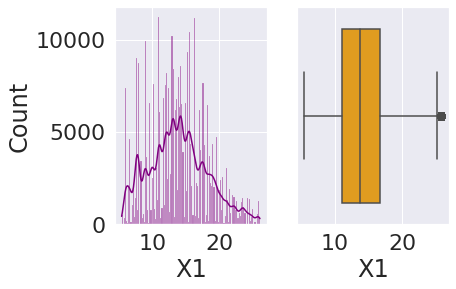

In [254]:
hand_missing(df,"X1")

In [255]:
df["X1"].describe()

count    338990.000000
mean         13.946271
std           4.377951
min           5.420000
25%          10.990000
50%          13.680000
75%          16.780000
max          26.060000
Name: X1, dtype: float64

In [256]:
#To handle missing values in the target column, we will be prediting the values using the model build and then append it to the data frame
df_topred_first = df[df["X1"].isnull()]

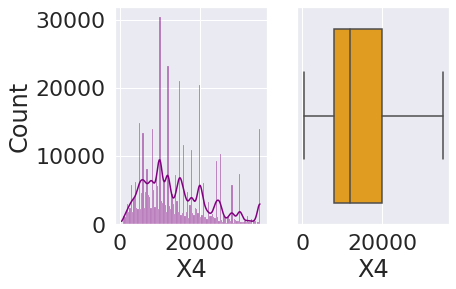

In [257]:
hand_missing(df,"X4")

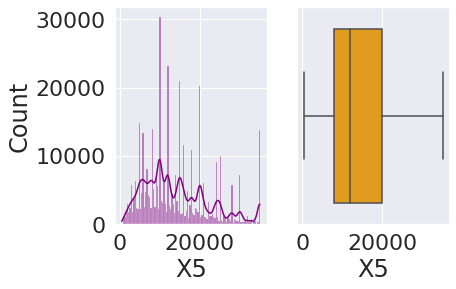

In [258]:
hand_missing(df,"X5")

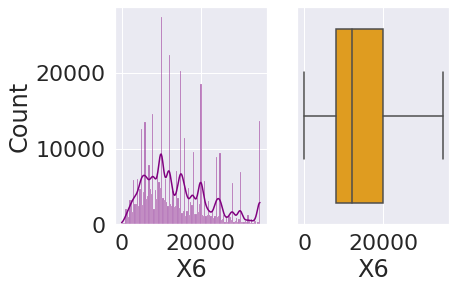

In [259]:
hand_missing(df,"X6")

In [260]:
def method_impute(df,col,method):
    if method=="mean":
        df[col] = df[col].fillna(df[col].mean())
    elif method=="mode":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [261]:
# for X4,X5,X6 it is safe to handle missing values using mean as there are no outliers (refer graphs above)

method_impute(df,"X4","mean")
method_impute(df,"X5","mean")
method_impute(df,"X6","mean")

In [262]:
df["X7"].value_counts()

36.0    292369
60.0    107630
Name: X7, dtype: int64

In [263]:
#imputing X7 with mode as 36 has very high value count
method_impute(df,"X7","mode")

In [264]:
df["X8"].value_counts()

B    101668
C     90071
D     55621
A     53707
E     25518
F      9784
G      2361
Name: X8, dtype: int64

In [265]:
#replacing the null values of X8,X9 with a new feature "Missing"
df["X8"] = df["X8"].fillna('Missing')
df["X9"] = df["X9"].fillna('Missing')

In [266]:
df["X10"].nunique()

187821

In [267]:
#replacing the null values for this column is very difficult because it is self filled and has a lot of unique values (imputing will cause high variance)
#So, it is better to drop this column

df.drop("X10",axis=1,inplace=True)
df_test.drop("X10",axis=1,inplace=True)

In [268]:
df["X11"].value_counts()

10.0    128060
2.0      35427
3.0      31428
0.0      30607
5.0      27277
1.0      25321
4.0      24035
6.0      23062
7.0      22837
8.0      19139
9.0      15269
Name: X11, dtype: int64

In [269]:
#here we are creating a new feature to capture the essense of the missing value for this column and then imputing it by mode
df['X11_missing'] = np.where(df['X11'] == "Missing", 1, 0)
df['X11_missing'] = np.where(df['X11'].isnull(),1,0)

In [270]:
mode = df['X11'].mode()[0]
df['X11'] = df['X11'].replace("Missing", mode)
df['X11'].fillna(mode, inplace=True)

mode_test = df_test["X11"].mode()[0]
df_test['X11_missing'] = np.where(df_test['X11'].isnull(),1,0)
df_test['X11'].fillna(mode_test, inplace=True)

In [271]:
df["X12"].value_counts()

MORTGAGE    172112
RENT        136778
OWN          29588
OTHER          124
NONE            36
ANY              1
Name: X12, dtype: int64

In [272]:
df_test["X12"].value_counts()

MORTGAGE    38994
RENT        32778
OWN          8228
Name: X12, dtype: int64

In [273]:
#replacing other values with "other"
df["X12"] = df["X12"].str.replace("NONE","OTHER")
df["X12"] = df["X12"].str.replace("ANY","OTHER")

In [274]:
#we are imputing the missing values of X12 with the two highest occuring values in a random order with greater probability given to the top value
import random
import numpy as np
def impute_missing_values_random(value):
    if pd.isna(value)==True:
        if random.uniform(0, 1) <= 0.7:
            return "MORTGAGE"
        else:
            return "RENT"
    else:
        return value

df['X12'] = df['X12'].apply(impute_missing_values_random)

In [275]:
df["X12"].value_counts()

MORTGAGE    215204
RENT        155047
OWN          29588
OTHER          161
Name: X12, dtype: int64

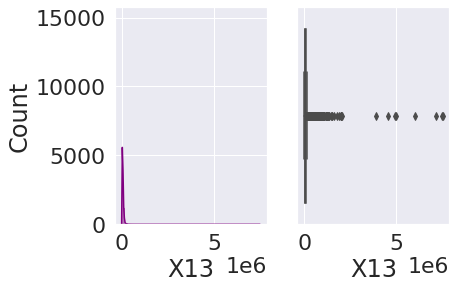

In [276]:
hand_missing(df,"X13")

In [277]:
#lot of outliers, so impute by median
method_impute(df,"X13","median")

In [278]:
df["X14"].unique()

array(['VERIFIED - income', 'not verified', 'VERIFIED - income source',
       nan], dtype=object)

In [279]:
#value counts is high for highest occuring, so we can impute by mode
method_impute(df,"X14","mode")

In [280]:
#value counts is high for highest occuring, so we can impute by mode
method_impute(df,"X15","mode")

In [281]:
#More than 75% missing values, so dropping is the best option
df.drop("X16",axis=1,inplace=True)
df_test.drop("X16",axis=1,inplace=True)

In [282]:
#value counts is high for highest occuring, so we can impute by mode
method_impute(df,"X17","mode")

In [283]:
#X17 AND X18 Both correspond to the type of loan (category) and X18 is just added info, so we can drop it 
df.drop("X18",axis=1,inplace=True)
df_test.drop("X18",axis=1,inplace=True)

In [284]:
#value counts is high for highest occuring, so we can impute by mode
method_impute(df,"X19","mode")

In [285]:
#since zip codes (X19) just like that will not be useful to us, we will replace them by their frequency of occurance in dataframe
zip_code_counts = df['X19'].value_counts().to_dict()
zip_code_counts_test = df_test['X19'].value_counts().to_dict()
df['X19_zip_count'] = df['X19'].map(zip_code_counts)
df_test['X19_zip_count'] = df_test['X19'].map(zip_code_counts_test)

In [286]:
#We dont need the zip column now, so dropping it
df.drop("X19",axis=1,inplace=True)
df_test.drop("X19",axis=1,inplace=True)

In [287]:
#doing the same for states (X20)
state_counts = df['X20'].value_counts().to_dict()
state_counts_test = df_test['X20'].value_counts().to_dict()
df['X20_state_count'] = df['X20'].map(state_counts)
df_test['X20_state_count'] = df_test['X20'].map(state_counts_test)

In [288]:
df.drop("X20",axis=1,inplace=True)
df_test.drop("X20",axis=1,inplace=True)

In [289]:
#value counts is high for highest occuring, so we can impute by mode
method_impute(df,"X20_state_count","mode")

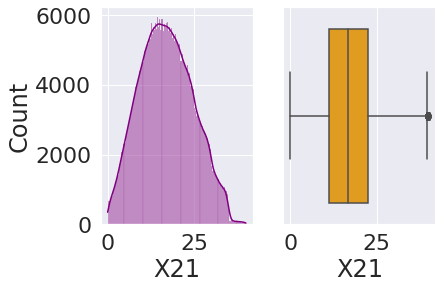

In [290]:
hand_missing(df,"X21")

In [291]:
#not many outliers, so we can impute by mean
method_impute(df,"X21","mean")

In [292]:
#value counts is high for highest occuring, so we can impute by mode
method_impute(df,"X22","mode")

In [293]:
#value counts is high for highest occuring, so we can impute by mode
method_impute(df,"X23","mode")

In [294]:
#value counts is high for highest occuring, so we can impute by mode
method_impute(df,"X24","mode")

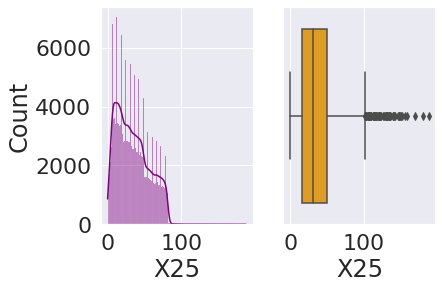

In [295]:
hand_missing(df,"X25")

In [296]:
#This column has a lot of outliers, so imputing by median
method_impute(df,"X25","median")
method_impute(df_test,"X25","median")

In [297]:
#This column has 60% missing values and is missing completely at random, so we are dropping it
df.drop("X26",axis=1,inplace=True)
df_test.drop("X26",axis=1,inplace=True)

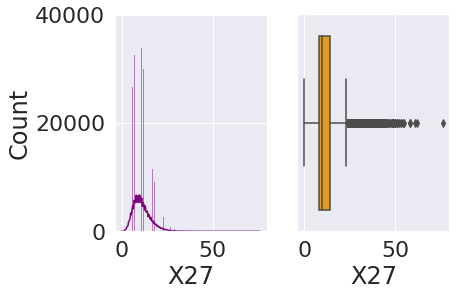

In [298]:
hand_missing(df,"X27")

In [299]:
#This column has a lot of outliers, so imputing by median
method_impute(df,"X27","median")

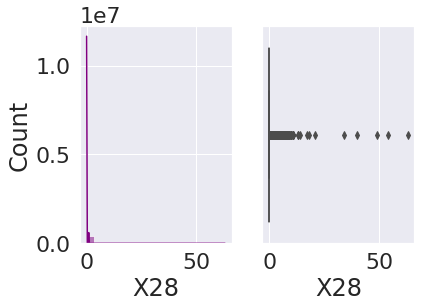

In [300]:
hand_missing(df,"X28")

In [301]:
#This column has a lot of outliers, so imputing by median
method_impute(df,"X28","median")

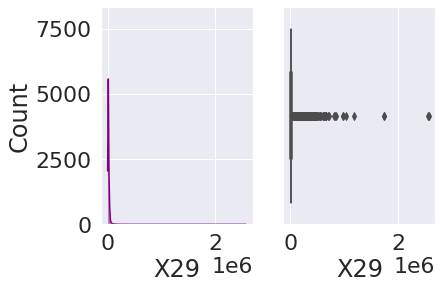

In [302]:
hand_missing(df,"X29")

In [303]:
#This column has a lot of outliers, so imputing by median
method_impute(df,"X29","median")

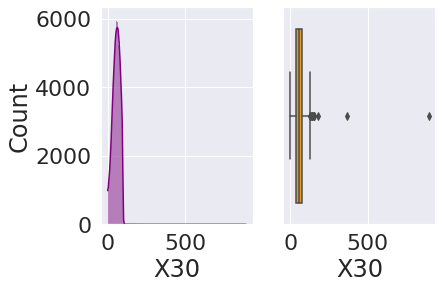

In [304]:
hand_missing(df,"X30")

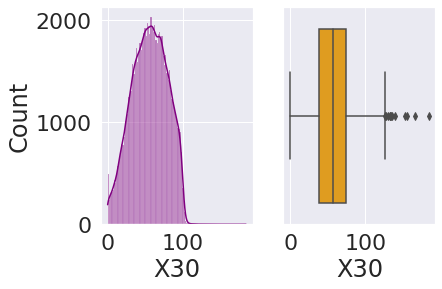

In [305]:
hand_missing(df_test,"X30")

In [306]:
#This column has a lot of outliers, so imputing by median
method_impute(df,"X30","mean")

In [307]:
#This column has a lot of outliers, so imputing by median
method_impute(df_test,"X30","mean")

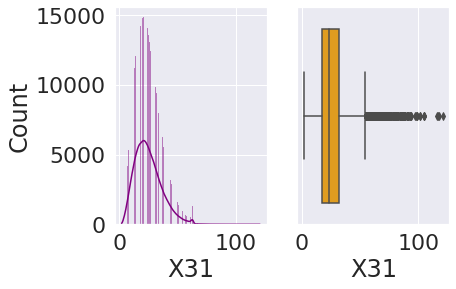

In [308]:
hand_missing(df,"X31")

In [309]:
#This column has a lot of outliers, so imputing by median
method_impute(df,"X31","median")

In [310]:
df["X32"].value_counts()

f    274313
w    125686
Name: X32, dtype: int64

In [311]:
#value counts is high for highest occuring value, so we can impute by mode
method_impute(df,"X32","mode")

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X1               338990 non-null  float64
 1   X4               400000 non-null  float64
 2   X5               400000 non-null  float64
 3   X6               400000 non-null  float64
 4   X7               400000 non-null  float64
 5   X8               400000 non-null  object 
 6   X9               400000 non-null  object 
 7   X11              400000 non-null  float64
 8   X12              400000 non-null  object 
 9   X13              400000 non-null  float64
 10  X14              400000 non-null  object 
 11  X15              400000 non-null  float64
 12  X17              400000 non-null  object 
 13  X21              400000 non-null  float64
 14  X22              400000 non-null  float64
 15  X23              400000 non-null  float64
 16  X24              400000 non-null  floa

In [313]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X1               0 non-null      float64
 1   X4               80000 non-null  float64
 2   X5               80000 non-null  float64
 3   X6               80000 non-null  float64
 4   X7               80000 non-null  float64
 5   X8               80000 non-null  object 
 6   X9               80000 non-null  object 
 7   X11              80000 non-null  float64
 8   X12              80000 non-null  object 
 9   X13              80000 non-null  float64
 10  X14              80000 non-null  object 
 11  X15              80000 non-null  float64
 12  X17              80000 non-null  object 
 13  X21              80000 non-null  float64
 14  X22              80000 non-null  float64
 15  X23              80000 non-null  float64
 16  X24              80000 non-null  float64
 17  X25         

In [314]:
df_test["X20_state_count"] = df_test["X20_state_count"].astype(float)

**3. Exploratory Data Analysis**

<AxesSubplot:>

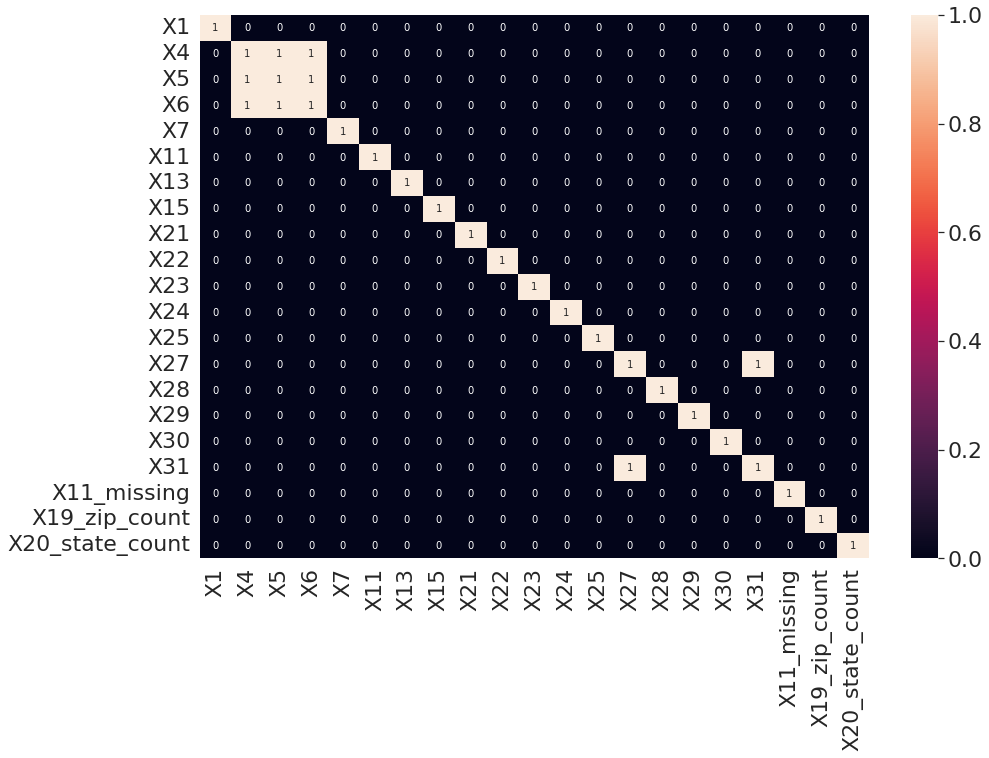

In [315]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()>0.6,annot=True)

We can see that some of the independent features are highly correlated to each other, so we will have to remove them.

<AxesSubplot:xlabel='X1', ylabel='Count'>

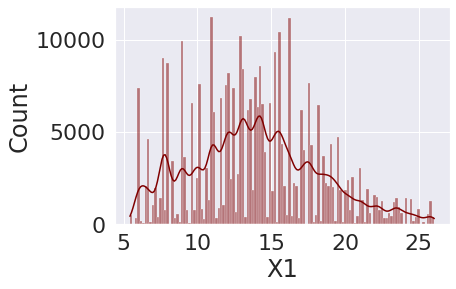

In [316]:
sns.histplot(x="X1",data=df,kde=True,color="maroon")

**4. Handling categorical features**

In [317]:
df["X8"].unique()

array(['B', 'D', 'C', 'A', 'E', 'F', 'Missing', 'G'], dtype=object)

In [318]:
df_test["X8"].unique()

array(['C', 'A', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [319]:
#X8 corresponds to loan subgrade (rank is imp),
#so mapping them into ranks instead of onehot encoding is the best option
X8_map_dict = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"Missing":7}

df["X8"] = df["X8"].map(X8_map_dict)
df_test["X8"] = df_test["X8"].map(X8_map_dict)


In [320]:
df["X9"].unique()

array(['B4', 'B5', 'D3', 'C2', 'C3', 'D4', 'B3', 'C5', 'A5', 'D2', 'B1',
       'C4', 'A4', 'A3', 'C1', 'E4', 'B2', 'A2', 'E2', 'F4', 'E1', 'D1',
       'F1', 'F2', 'A1', 'F3', 'E5', 'D5', 'Missing', 'E3', 'G5', 'F5',
       'G1', 'G4', 'G3', 'G2'], dtype=object)

In [321]:
def X9_replace(df):
    df["X9"] = df["X9"].str.replace("A","0")
    df["X9"] = df["X9"].str.replace("B","1")
    df["X9"] = df["X9"].str.replace("C","2")
    df["X9"] = df["X9"].str.replace("D","3")
    df["X9"] = df["X9"].str.replace("E","4")
    df["X9"] = df["X9"].str.replace("F","5")
    df["X9"] = df["X9"].str.replace("G","6")
    df["X9"] = df["X9"].str.replace("Missing","7")
    df["X9"] = df["X9"].astype(int)

In [322]:
X9_replace(df)

In [323]:
X9_replace(df_test)

In [324]:
df_test["X12"].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [325]:
#for type of housing, rank is important too, so label encoding is the best option
X12_map_dict = {"OWN":0,"RENT":1,"MORTGAGE":2,"OTHER":3}

df["X12"] = df["X12"].map(X12_map_dict)
df_test["X12"] = df_test["X12"].map(X12_map_dict)

In [326]:
df["X14"].unique()

array(['VERIFIED - income', 'not verified', 'VERIFIED - income source'],
      dtype=object)

In [327]:
#converting this column to binary  values (verified or not verified)
X14_map_dict = {"VERIFIED - income":0,"VERIFIED - income source":0,"not verified":1}

df["X14"] = df["X14"].map(X14_map_dict)
df_test["X14"] = df_test["X14"].map(X14_map_dict)

In [328]:
df["X17"].unique()

array(['debt_consolidation', 'credit_card', 'car', 'home_improvement',
       'small_business', 'major_purchase', 'moving', 'other', 'house',
       'vacation', 'educational', 'wedding', 'medical',
       'renewable_energy'], dtype=object)

In [329]:
df_test["X17"].unique()

array(['debt_consolidation', 'car', 'credit_card', 'home_improvement',
       'small_business', 'other', 'moving', 'vacation', 'medical',
       'major_purchase', 'renewable_energy', 'house', 'wedding'],
      dtype=object)

In [330]:
#X17 needs onehot encoding as there is no rank relation between these categorical variables
X17_dum_df = pd.get_dummies(df["X17"],drop_first=True)
X17_dum_dft = pd.get_dummies(df_test["X17"],drop_first=True)

In [331]:
df = pd.concat([df,X17_dum_df],axis=1)
df_test = pd.concat([df_test,X17_dum_dft],axis=1)

In [332]:
df_test["educational"]=0

In [333]:
df_test["educational"] = df_test["educational"].astype("uint8")

In [334]:
#x16 is loan reason and x17 and category of loan and why it is required, so both columns are not necessary and one is enough to describe the reason
df.drop("X17",axis=1,inplace=True)
df_test.drop("X17",axis=1,inplace=True)

In [335]:
df["X32"].value_counts()

f    274314
w    125686
Name: X32, dtype: int64

In [336]:
#X32 needs onehot encoding as there is no rank relation between these categorical variables
X32_dum_df = pd.get_dummies(df["X32"],drop_first=True)
X32_dum_dft = pd.get_dummies(df_test["X32"],drop_first=True)

df = pd.concat([df,X32_dum_df],axis=1)
df_test = pd.concat([df_test,X32_dum_dft],axis=1)

df.drop("X32",axis=1,inplace=True)
df_test.drop("X32",axis=1,inplace=True)

In [337]:
df_final = df.dropna()

**5. Feature Selection**

<AxesSubplot:>

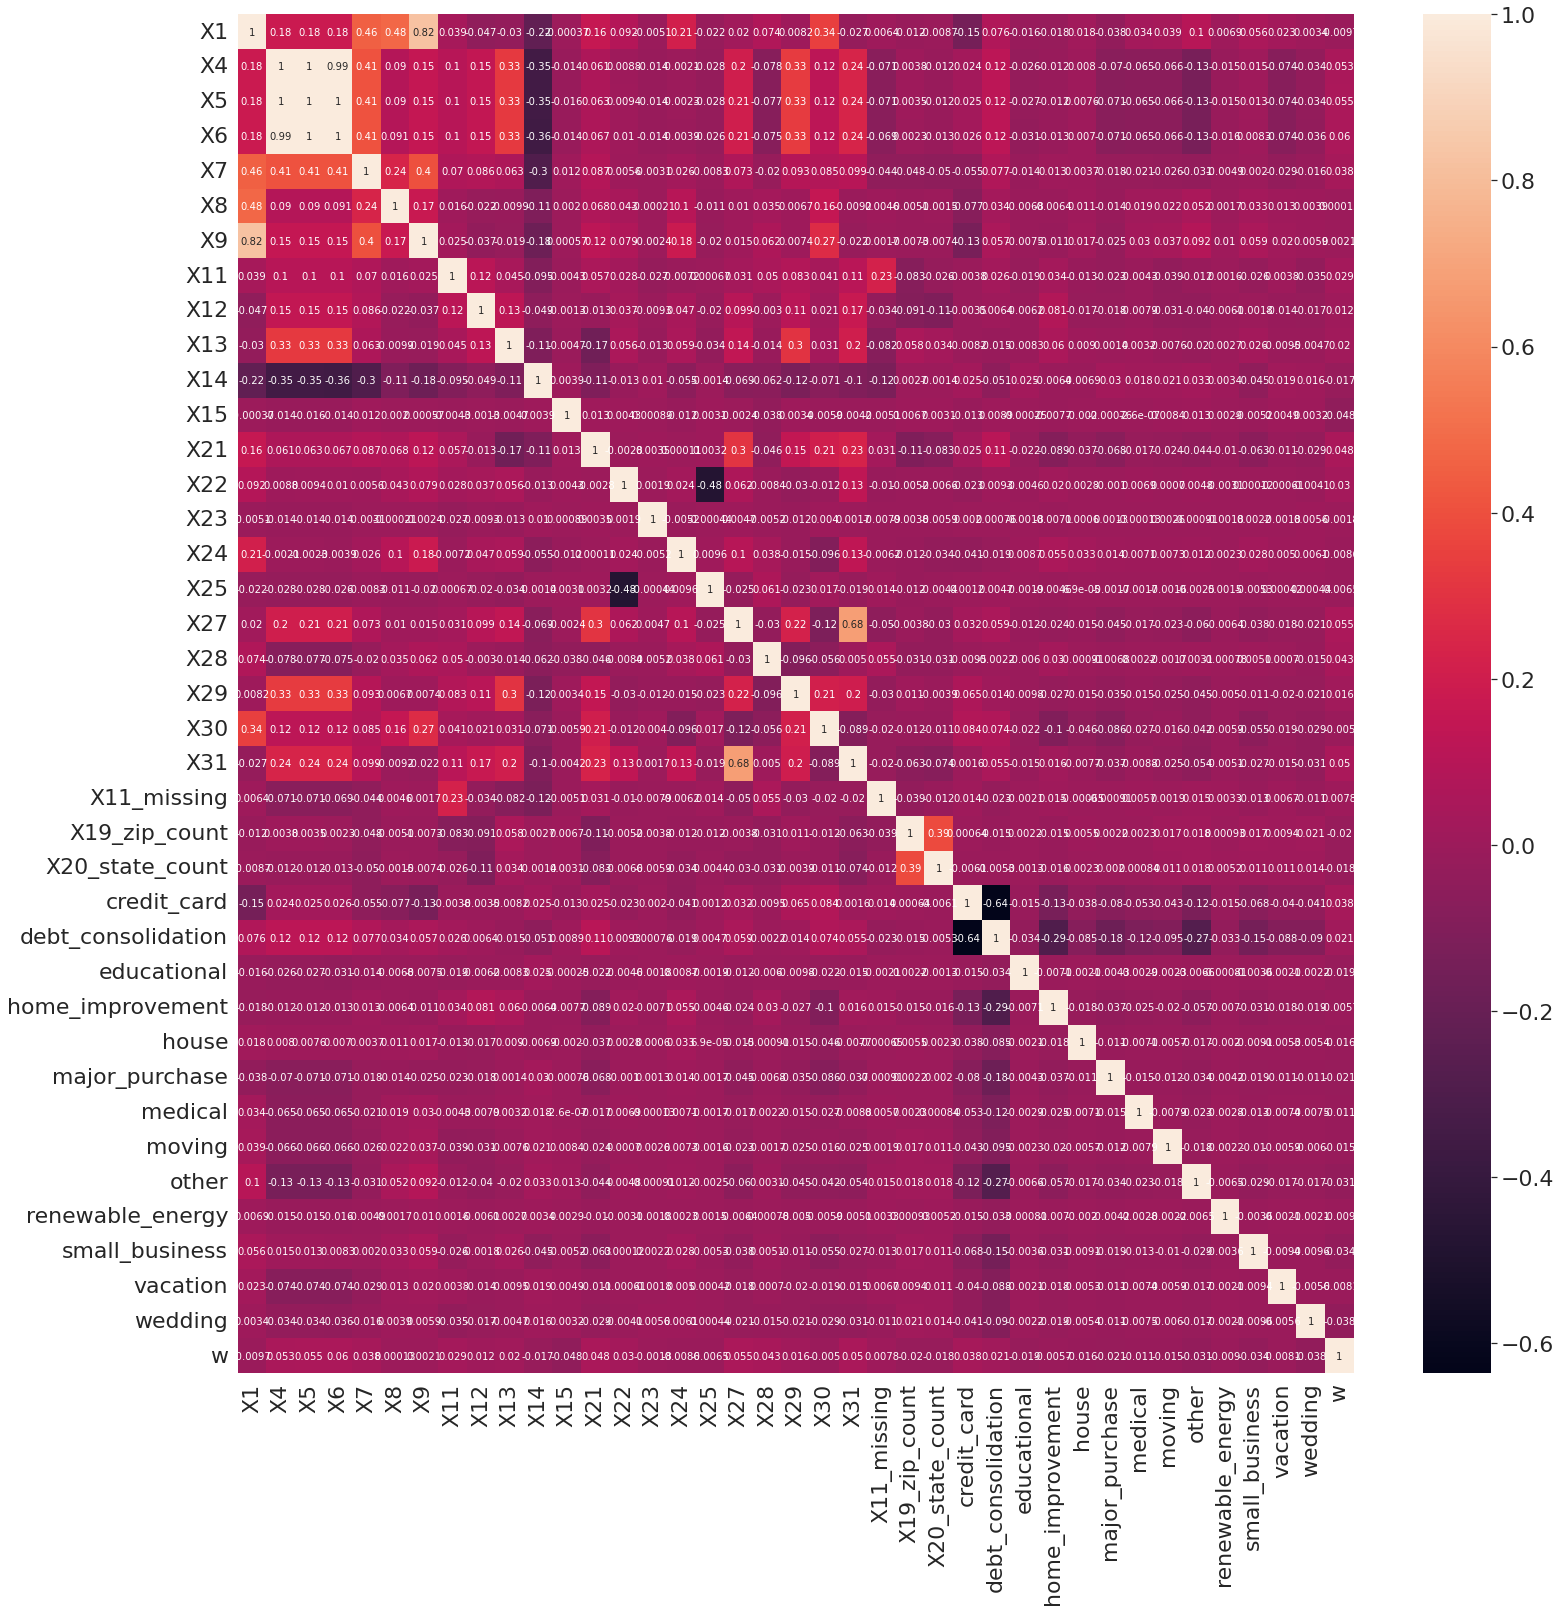

In [338]:
plt.figure(figsize=(25,25))
sns.heatmap(df_final.corr(),annot=True)

We can see that column X4 is highly correlated to X5 and X6. So we will be dropping columns X5 and X6 and keep only X4.

In [339]:
df_final.drop(["X5","X6"],axis=1,inplace=True)
df_test.drop(["X5","X6"],axis=1,inplace=True)

**6. Model Building**

In [340]:
X = df_final.drop("X1",axis=1)
y = df_final["X1"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [341]:
df_test.drop("X1",axis=1,inplace=True)

In [342]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
scores = {}
Accuracy_R2 = []
cv_scores_R2 = []
Mean_Squared_Errors = []
Mean_Absolute_Errors = []

def model(model):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    score = r2_score(y_test,y_pred)
    print("Accuracy (R2_score): {}%".format(round(score*100,2)))
    Accuracy_R2.append(round(score*100,2))
    
    cv_score = cross_val_score(model,X_train,y_train,scoring = 'r2',cv=4)
    print("Cross Val Score (R2): {}%".format(round(np.mean(cv_score)*100,2)))
    cv_scores_R2.append(round(np.mean(cv_score)*100,2))
    
    Mean_Squared_Error = round(mean_squared_error(y_test,y_pred),4)
    print("Mean_Squared_Error: {}".format(Mean_Squared_Error))
    Mean_Squared_Errors.append(Mean_Squared_Error)
    
    Mean_Absolute_Error = round(mean_absolute_error(y_test,y_pred),4)
    print("Mean_Absolute_Error: {}".format(Mean_Absolute_Error))
    Mean_Absolute_Errors.append(Mean_Absolute_Error)
    
    sns.distplot(y_test-y_pred,color="green")
    plt.show()

Accuracy (R2_score): 90.78%
Cross Val Score (R2): 90.37%
Mean_Squared_Error: 1.7779
Mean_Absolute_Error: 0.7718


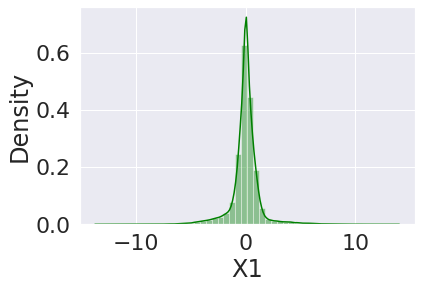

CPU times: user 7min 9s, sys: 1.27 s, total: 7min 11s
Wall time: 1min 51s


In [343]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_jobs=-1)
%time model(xgb)

Accuracy (R2_score): 82.3%
Cross Val Score (R2): 81.79%
Mean_Squared_Error: 3.4124
Mean_Absolute_Error: 1.2427


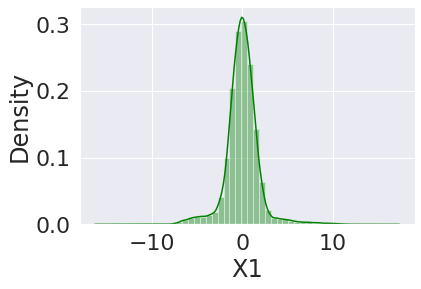

CPU times: user 4.89 s, sys: 2.35 s, total: 7.24 s
Wall time: 2.6 s


In [344]:
lr = LinearRegression()
%time model(lr)

Accuracy (R2_score): 89.93%
Cross Val Score (R2): 89.66%
Mean_Squared_Error: 1.9403
Mean_Absolute_Error: 0.7843


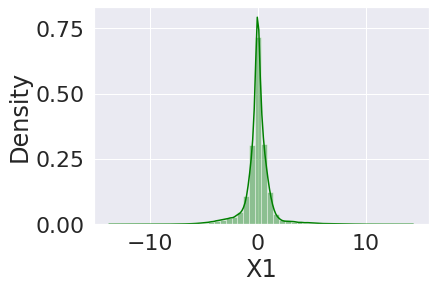

CPU times: user 9min 5s, sys: 4.13 s, total: 9min 9s
Wall time: 8min 48s


In [345]:
rf = RandomForestRegressor(n_jobs=workers) #time
%time model(rf)

Accuracy (R2_score): 79.35%
Cross Val Score (R2): 79.01%
Mean_Squared_Error: 3.9809
Mean_Absolute_Error: 1.0145


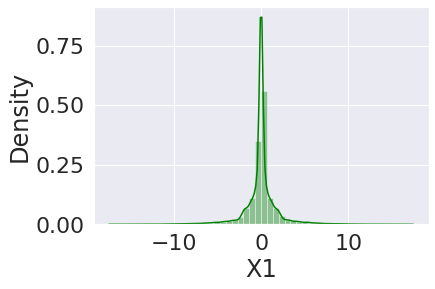

CPU times: user 22.7 s, sys: 421 ms, total: 23.1 s
Wall time: 22.5 s


In [346]:
df = DecisionTreeRegressor()
%time model(df)

Accuracy (R2_score): 71.68%
Cross Val Score (R2): 71.58%
Mean_Squared_Error: 5.4589
Mean_Absolute_Error: 1.716


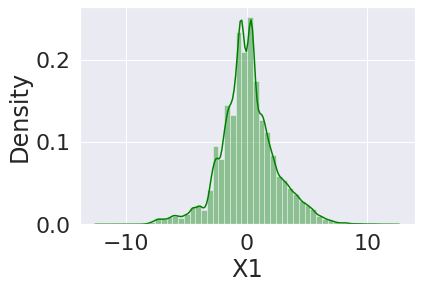

CPU times: user 2min 34s, sys: 2.7 s, total: 2min 37s
Wall time: 2min 37s


In [347]:
ada = AdaBoostRegressor()
%time model(ada)

Accuracy (R2_score): 88.69%
Cross Val Score (R2): 88.3%
Mean_Squared_Error: 2.1803
Mean_Absolute_Error: 0.9032


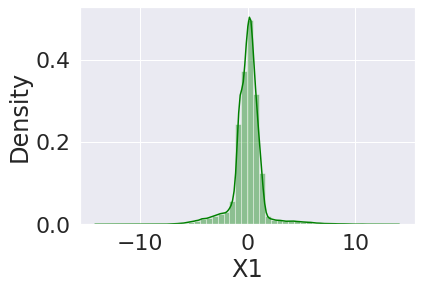

CPU times: user 5min 2s, sys: 466 ms, total: 5min 3s
Wall time: 5min 3s


In [348]:
gbr = GradientBoostingRegressor()
%time model(gbr)

Accuracy (R2_score): 80.66%
Cross Val Score (R2): 80.13%
Mean_Squared_Error: 3.7272
Mean_Absolute_Error: 1.2854


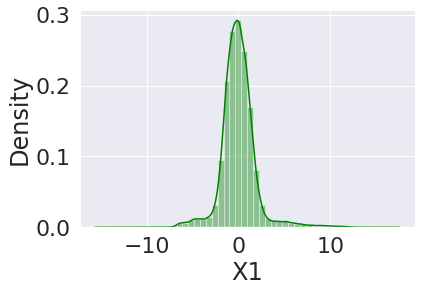

CPU times: user 3.66 s, sys: 1.94 s, total: 5.6 s
Wall time: 2.12 s


In [349]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()
%time model(en)

Accuracy (R2_score): 90.48%
Cross Val Score (R2): 90.13%
Mean_Squared_Error: 1.8342
Mean_Absolute_Error: 0.8005


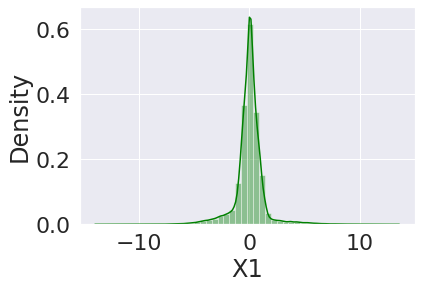

CPU times: user 49.3 s, sys: 648 ms, total: 50 s
Wall time: 14 s


In [350]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_jobs=workers)
%time model(lgbm)

In [351]:
models = ["XGBRegressor","LinearRegression","RandomForestRegressor","DecisionTreeRegressor",
          "AdaBoostRegressor","GradientBoostingRegressor","ElasticNet","LGBMRegressor"]

In [352]:
scores = { "Model Name" : models , "Accuracy Score (R2)" : Accuracy_R2, "Cross val Score (R2)": cv_scores_R2,
          "Mean Squared Error" : Mean_Squared_Errors,"Mean Absolute Error":Mean_Absolute_Errors}

In [353]:
df_scores = pd.DataFrame(scores)
df_scores.sort_values(by='Cross val Score (R2)', ascending=False)

,Model Name,Accuracy Score (R2),Cross val Score (R2),Mean Squared Error,Mean Absolute Error
0,XGBRegressor,90.78,90.37,1.7779,0.7718
7,LGBMRegressor,90.48,90.13,1.8342,0.8005
2,RandomForestRegressor,89.93,89.66,1.9403,0.7843
5,GradientBoostingRegressor,88.69,88.30,2.1803,0.9032
1,LinearRegression,82.30,81.79,3.4124,1.2427
6,ElasticNet,80.66,80.13,3.7272,1.2854
3,DecisionTreeRegressor,79.35,79.01,3.9809,1.0145
4,AdaBoostRegressor,71.68,71.58,5.4589,1.7160


Text(0.5, 1.0, 'Model Comparision by Score (R2)')

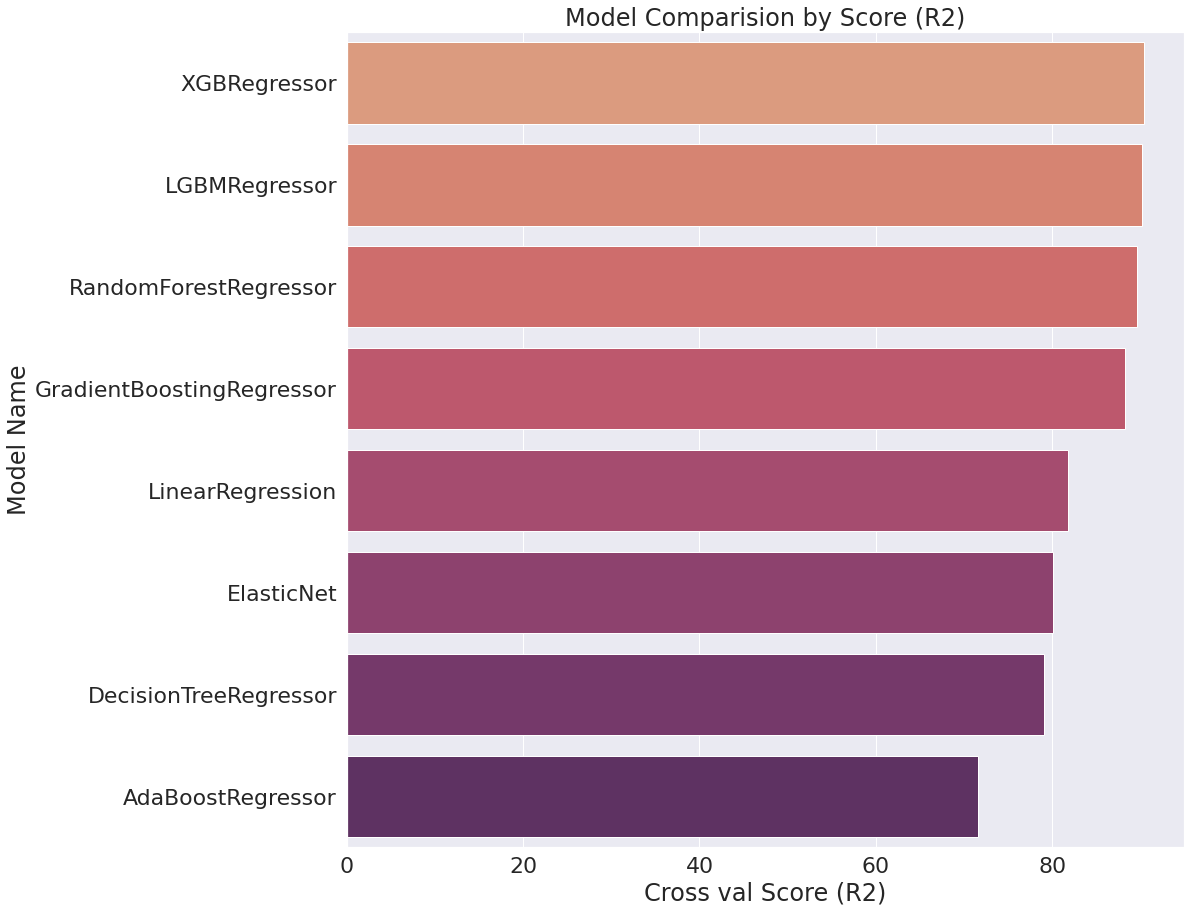

In [354]:
plt.figure(figsize = (15,15))
sns.set(font_scale=2)

sns.barplot(y = "Model Name", x = "Cross val Score (R2)", data=df_scores,palette="flare"
            ,order=df_scores.sort_values('Cross val Score (R2)',ascending=False)["Model Name"])
plt.title("Model Comparision by Score (R2)")

We can see that the XGBoostRegressor gives us the best results when compared to the others. It is closely followed by LGBM Regressor. 

We will now tune the XGBoostRegressor to achieve better accuracy

**7. Hyper Parameter Tuning**

In [361]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [365]:
param_grid = {"n_estimators" : range(80,130,10),
             "learning_rate" : [0.3,0.4,0.5],
             'max_depth': range(4,8,1)}

In [368]:
rsearch = RandomizedSearchCV(estimator = xgb,param_distributions=param_grid,cv=2,scoring="accuracy",n_jobs=-1,n_iter = 5,verbose=3,random_state=42)

In [369]:
import warnings
warnings.filterwarnings("ignore")

%time rsearch.fit(X_train,y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
CPU times: user 56.3 s, sys: 551 ms, total: 56.9 s
Wall time: 2min 9s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                 

In [370]:
rsearch.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=80, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [394]:
xgb_final = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,monotone_constraints='()', n_estimators=120, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

Accuracy (R2_score): 90.8%
Cross Val Score (R2): 90.49%
Mean_Squared_Error: 1.7731
Mean_Absolute_Error: 0.7701


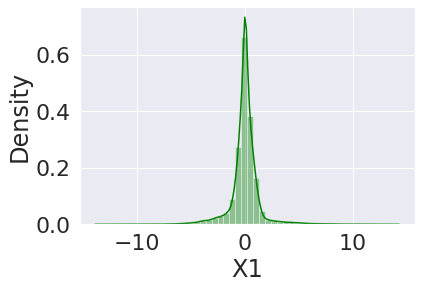

CPU times: user 8min 46s, sys: 1.42 s, total: 8min 47s
Wall time: 2min 17s


In [395]:
%time model(xgb_final)

In [396]:
models = ["XGBRegressor","LinearRegression","RandomForestRegressor","DecisionTreeRegressor",
          "AdaBoostRegressor","GradientBoostingRegressor","ElasticNet","LGBMRegressor","XGBRegressor_Tuned"]

In [397]:
scores = { "Model Name" : models , "Accuracy Score (R2)" : Accuracy_R2, "Cross val Score (R2)": cv_scores_R2,
          "Mean Squared Error" : Mean_Squared_Errors,"Mean Absolute Error":Mean_Absolute_Errors}

In [398]:
df_scores = pd.DataFrame(scores)
df_scores.sort_values(by='Cross val Score (R2)', ascending=False)

,Model Name,Accuracy Score (R2),Cross val Score (R2),Mean Squared Error,Mean Absolute Error
8,XGBRegressor_Tuned,90.80,90.49,1.7731,0.7701
0,XGBRegressor,90.78,90.37,1.7779,0.7718
7,LGBMRegressor,90.48,90.13,1.8342,0.8005
2,RandomForestRegressor,89.93,89.66,1.9403,0.7843
5,GradientBoostingRegressor,88.69,88.30,2.1803,0.9032
1,LinearRegression,82.30,81.79,3.4124,1.2427
6,ElasticNet,80.66,80.13,3.7272,1.2854
3,DecisionTreeRegressor,79.35,79.01,3.9809,1.0145
4,AdaBoostRegressor,71.68,71.58,5.4589,1.7160


Text(0.5, 1.0, 'Model Comparision by Score (R2)')

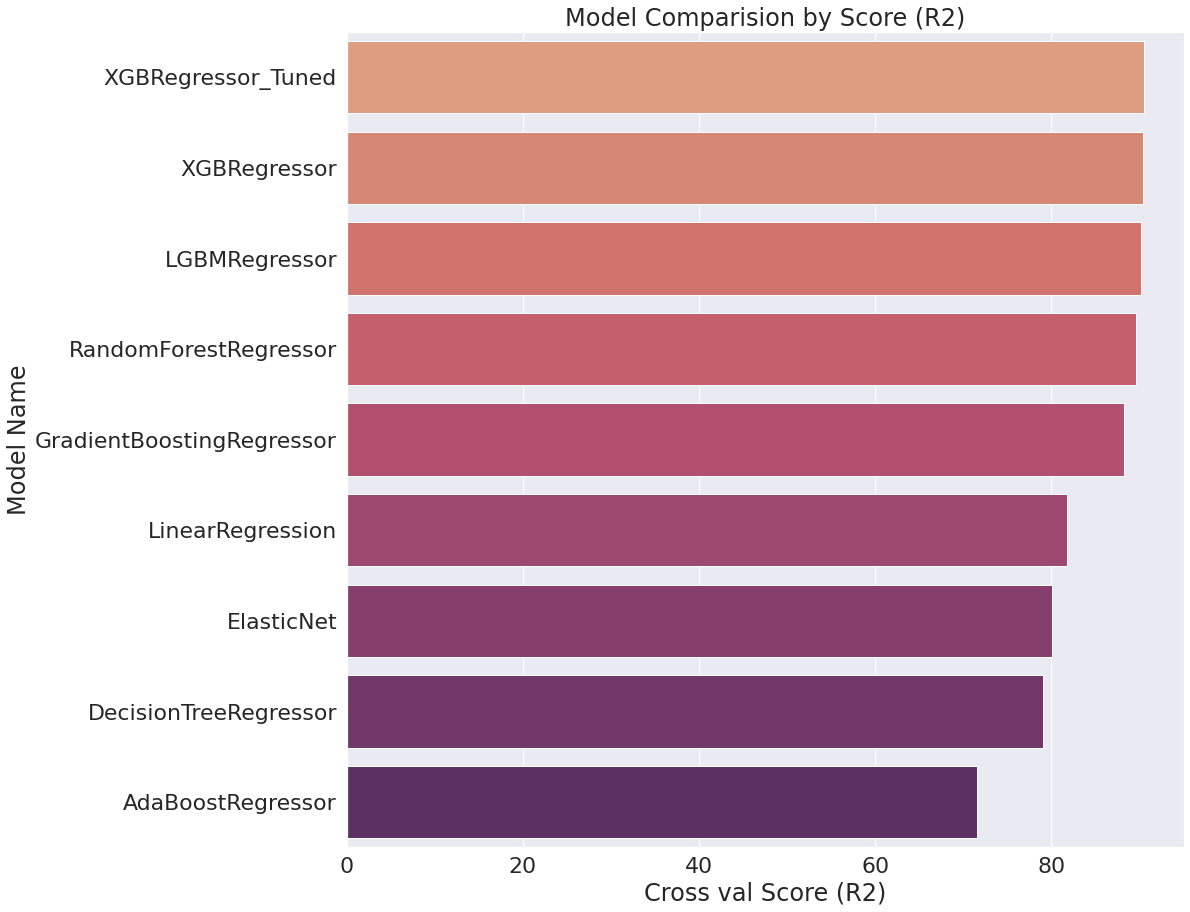

In [399]:
plt.figure(figsize = (15,15))
sns.set(font_scale=2)

sns.barplot(y = "Model Name", x = "Cross val Score (R2)", data=df_scores,palette="flare"
            ,order=df_scores.sort_values('Cross val Score (R2)',ascending=False)["Model Name"])
plt.title("Model Comparision by Score (R2)")

**We can see that the XGBoost Regressor with its parameters tuned gives us the best results overall.**

**8. Prediction on unseen data (df_test) and saving results in a csv file**

In [400]:
y_pred = xgb_final.predict(df_test)

target_results = pd.DataFrame(y_pred)

In [401]:
target_results.shape

(80000, 1)

In [402]:
target_results.rename(columns = {0:'X1'}, inplace = True)

target_results.head()

,X1
0,16.380920
1,6.196990
2,14.236595
3,16.848173
4,9.930317


In [403]:
target_results.to_csv("Loan Prediction Results from Suyash Lakhani.csv")